In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from lightgbm import LGBMClassifier

In [31]:
# Loading the data
train_data = pd.read_csv('train.csv')

In [32]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [33]:
train_data.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [5]:
train_data.shape

(20758, 18)

In [34]:
# Defining broader age ranges
def get_age_group(age):
    if age <= 17:
        return '0-17'
    elif age <= 25:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-50'
    elif age <= 55:
        return '51-64'
    else:
        return '65+'

train_data['Age_Group'] = train_data['Age'].apply(get_age_group)

# Calculating BMI and add it as a new feature
train_data['BMI'] = train_data['Weight'] / (train_data['Height'] ** 2)

# Calculating the amount of weight needed to reach a normal BMI of 25
def weight_to_normal(weight, height):
    normal_weight = 25 * (height ** 2)
    return weight - normal_weight

train_data['Weight_To_Normal'] = train_data.apply(lambda row: weight_to_normal(row['Weight'], row['Height']), axis=1)

# Re-checking for missing values and duplicates after adding new features
print("Missing values per column:")
print(train_data.isnull().sum())
print("\nNumber of duplicate rows:")
print(train_data.duplicated().sum())

Missing values per column:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
Age_Group                         0
BMI                               0
Weight_To_Normal                  0
dtype: int64

Number of duplicate rows:
0


In [35]:
#Finding distinct Obesity Levels in the dataset
distinct_values = train_data['NObeyesdad'].unique()
print(distinct_values)

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [8]:
# Checking for missing values
train_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
Age_Group                         0
BMI                               0
Weight_To_Normal                  0
dtype: int64

In [36]:
# Checking for duplicated values
duplicates = train_data.duplicated()
num_duplicates = duplicates.sum()

print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


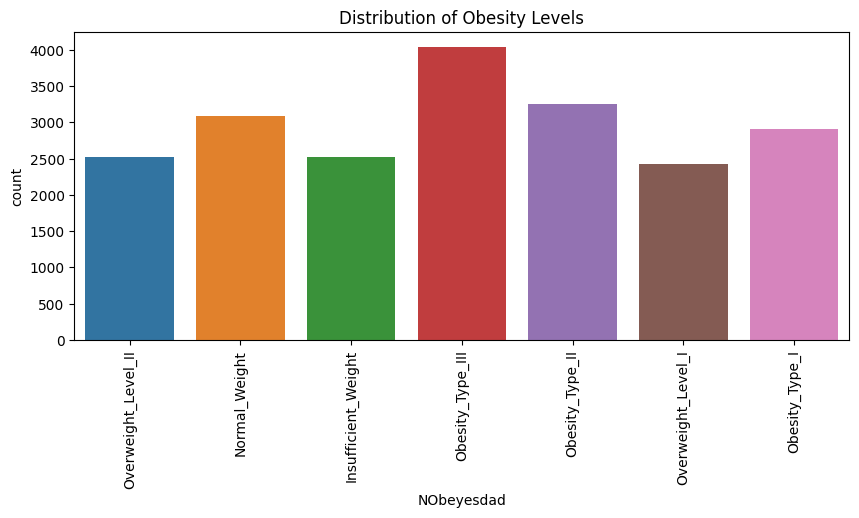

In [10]:
#Distribution of Obesity Levels

plt.figure(figsize=(10, 4))
sns.countplot(x='NObeyesdad', data=train_data)
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=90)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


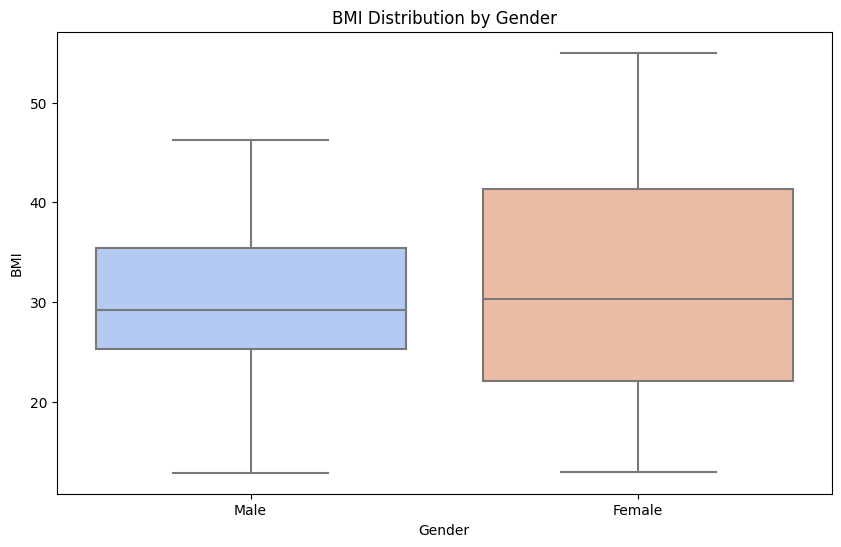

In [54]:
#BMI Distribution by Gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='BMI', data=train_data, palette='coolwarm')
plt.title('BMI Distribution by Gender')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

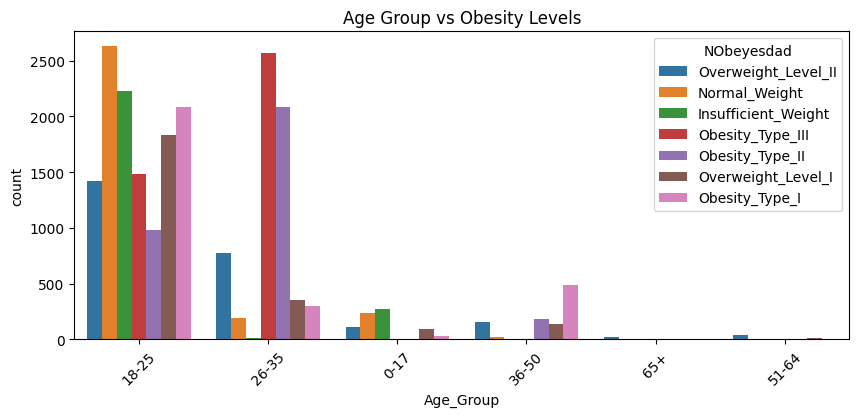

In [55]:
#Age Group vs Obesity Levels

plt.figure(figsize=(10, 4))
sns.countplot(x='Age_Group', hue='NObeyesdad', data=train_data)
plt.title('Age Group vs Obesity Levels')
plt.xticks(rotation=45)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

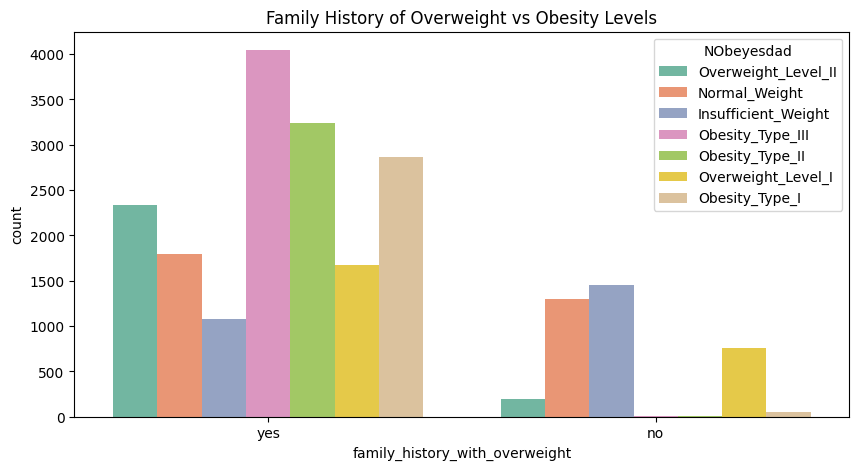

In [56]:
#Family History of Overweight vs Obesity Levels

plt.figure(figsize=(10, 5))
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=train_data, palette='Set2')
plt.title('Family History of Overweight vs Obesity Levels')
plt.show()

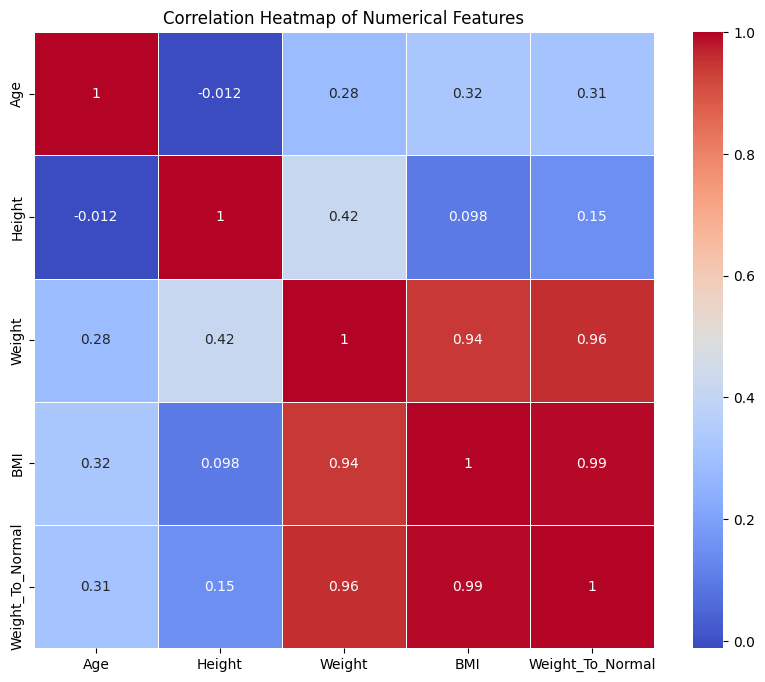

In [57]:
#Correlation Heatmap of Numerical Features

plt.figure(figsize=(10, 8))
sns.heatmap(train_data[['Age', 'Height', 'Weight', 'BMI', 'Weight_To_Normal']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

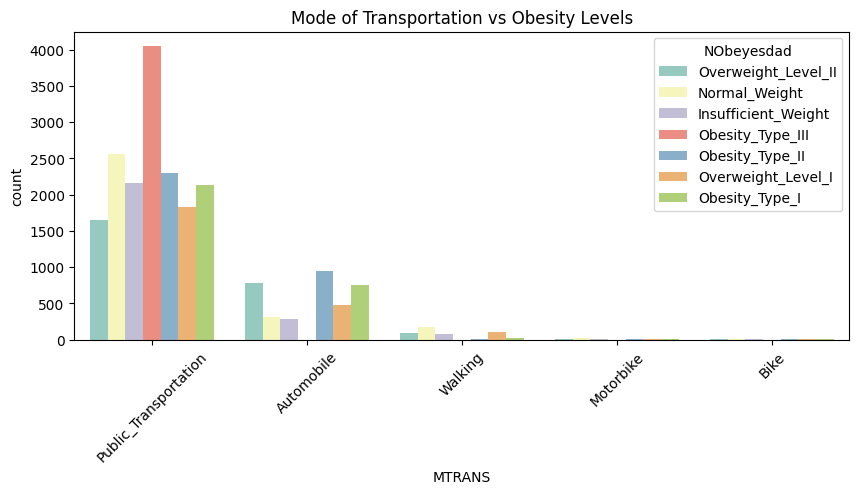

In [58]:
#Mode of Transportation vs Obesity Levels

plt.figure(figsize=(10, 4))
sns.countplot(x='MTRANS', hue='NObeyesdad', data=train_data, palette='Set3')
plt.title('Mode of Transportation vs Obesity Levels')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Encoding target variable into numerical labels
label_encoder = LabelEncoder()
train_data['NObeyesdad'] = label_encoder.fit_transform(train_data['NObeyesdad'])

In [38]:
# Splitting the features and target variable

X = train_data.drop(columns=['NObeyesdad'])
y = train_data['NObeyesdad']

In [39]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Age_Group']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI', 'Weight_To_Normal']

In [40]:
# Splitting the data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Defining preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [42]:
# Defining the LGBM model

lgbm_model = LGBMClassifier()

In [43]:
# Defining the pipeline

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', lgbm_model)])

In [44]:
# Defining hyperparameters for randomized search
param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [3, 5, 7, 9, 11],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'classifier__subsample': [0.5, 0.7, 0.9, 1.0],
    'classifier__colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'classifier__min_child_samples': [10, 20, 30, 40, 50],
    'classifier__reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'classifier__reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'classifier__min_child_weight': [1e-3, 1e-2, 0.1, 1, 10]
}

In [45]:
# Performing randomized search cross-validation

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                   n_iter=2, 
                                   cv=3, 
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2551
[LightGBM] [Info] Number of data points in the train set: 11071, number of used features: 36
[LightGBM] [Info] Start training from score -2.116897
[LightGBM] [Info] Start training from score -1.911464
[LightGBM] [Info] Start training from score -1.948171
[LightGBM] [Info] Start training from score -1.857943
[LightGBM] [Info] Start training from score -1.633295
[LightGBM] [Info] Start training from score -2.145818
[LightGBM] [Info] Start training from score -2.112406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Height',
                                                                                'Weight',
                                                                                'FCVC',
                                                                                'NCP',
                                                                                'CH2O',
                                                                                'FAF',
                                                                                'TUE',
                                                                                'BMI',
                                                                                'Weight_To_Normal']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Gender',
                                                                                'family_history_with_overweigh...
                                                                      0.2,
                                                                      0.3],
                                        'classifier__max_depth': [3, 5, 7, 9,
                                                                  11],
                                        'classifier__min_child_samples': [10,
                                                                          20,
                                                                          30,
                                                                          40,
                                                                          50],
                                        'classifier__min_child_weight': [0.001,
                                                                         0.01,
                                                                         0.1, 1,
                                                                         10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300, 400,
                                                                     500],
                                        'classifier__reg_alpha': [0.0, 0.1, 0.5,
                                                                  1.0],
                                        'classifier__reg_lambda': [0.0, 0.1,
                                                                   0.5, 1.0],
                                        'classifier__subsample': [0.5, 0.7, 0.9,
                                                                  1.0]},
                   random_state=42, verbose=2)

In [46]:
# Getting the best parameters

best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [47]:
print("Best Parameters:", best_params)

Best Parameters: {'classifier__subsample': 0.9, 'classifier__reg_lambda': 0.1, 'classifier__reg_alpha': 0.5, 'classifier__n_estimators': 100, 'classifier__min_child_weight': 0.01, 'classifier__min_child_samples': 20, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.2, 'classifier__colsample_bytree': 0.5}


In [48]:
# Evaluating the best model on the validation set to find the accuracy

accuracy = best_model.score(X_test, y_test)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9058285163776493


In [49]:
# Finding Best model on entire dataset

best_model.fit(X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2567
[LightGBM] [Info] Number of data points in the train set: 20758, number of used features: 38
[LightGBM] [Info] Start training from score -2.107483
[LightGBM] [Info] Start training from score -1.907353
[LightGBM] [Info] Start training from score -1.964779
[LightGBM] [Info] Start training from score -1.854892
[LightGBM] [Info] Start training from score -1.635203
[LightGBM] [Info] Start training from score -2.146276
[LightGBM] [Info] Start training from score -2.107879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE', 'BMI',
                                                   'Weight_To_Normal']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS',
                                                   'Age_Group'])])),
                ('classifier',
                 LGBMClassifier(colsample_bytree=0.5, learning_rate=0.2,
                                max_depth=3, min_child_weight=0.01,
                                reg_alpha=0.5, reg_lambda=0.1,
                                subsample=0.9))])

In [50]:
# Preparing test data

test_data = pd.read_csv('test.csv')

In [51]:
# Defining broader age ranges
def get_age_group(age):
    if age <= 17:
        return '0-17'
    elif age <= 25:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-50'
    elif age <= 55:
        return '51-64'
    else:
        return '65+'

# Applying age grouping to the DataFrame

test_data['Age_Group'] = test_data['Age'].apply(get_age_group)

# Calculating BMI and add it as a new feature

test_data['BMI'] = test_data['Weight'] / (test_data['Height'] ** 2)

# Calculating the amount of weight needed to reach a normal BMI of 25

def weight_to_normal(weight, height):
    normal_weight = 25 * (height ** 2)
    return weight - normal_weight

test_data['Weight_To_Normal'] = test_data.apply(lambda row: weight_to_normal(row['Weight'], row['Height']), axis=1)

# Re-checking for missing values and duplicates after adding new features

print("Missing values per column:")
print(train_data.isnull().sum())
print("\nNumber of duplicate rows:")
print(train_data.duplicated().sum())

Missing values per column:
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
Age_Group                         0
BMI                               0
Weight_To_Normal                  0
dtype: int64

Number of duplicate rows:
0


In [52]:
# Making predictions on test data

test_predictions = best_model.predict(test_data)

In [53]:
# Creating submission dataframe

submission_df = pd.DataFrame({'id': test_data['id'], 
                              'NObeyesdad': label_encoder.inverse_transform(test_predictions)})

In [54]:
submission_df.to_csv('submission.csv', index=False)

In [55]:
import joblib

In [56]:
joblib.dump(best_model,'trained_model')

['trained_model']

In [57]:
joblib.dump(label_encoder,'label_encoder')

['label_encoder']

In [58]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Loading the label encoder for the target variable
label_encoder = LabelEncoder()
label_encoder.classes_ = pd.read_pickle('label_encoder')

# Loading the saved model
best_model = joblib.load('trained_model')

def predict_obesity():
    # Get user input
    gender = gender_var.get()
    age = float(age_entry.get())
    height_cm = float(height_entry.get())
    weight = float(weight_entry.get())
    family_history = family_history_var.get()
    favc = favc_var.get()
    fcvc = float(fcvc_entry.get())
    ncp = float(ncp_entry.get())
    caec = caec_var.get()
    smoke = smoke_var.get()
    ch2o = float(ch2o_entry.get())
    scc = scc_var.get()
    faf = float(faf_entry.get())
    tue = float(tue_entry.get())
    calc = calc_var.get()
    mtrans = mtrans_var.get()

    # Calculating BMI using height in centimeters
    bmi = (weight / (height_cm ** 2)) * 10000  # Multiplied by 10000 to adjust for cm^2

    # Defining the BMI range for normal weight
    min_bmi_for_normal_weight = 18.5
    max_bmi_for_normal_weight = 24.9

    # Calculating the weight corresponding to the minimum and maximum BMI for the given height
    min_weight_for_normal_bmi = min_bmi_for_normal_weight * (height_cm ** 2) / 10000
    max_weight_for_normal_bmi = max_bmi_for_normal_weight * (height_cm ** 2) / 10000

    # Determining weight_to_normal and obesity level
    if weight < min_weight_for_normal_bmi:
        weight_to_normal = min_weight_for_normal_bmi - weight
        print(f"The current person has a BMI of {bmi:.2f} and needs to gain {weight_to_normal:.2f} kg to achieve the normal BMI range.")
        print("Predicted Obesity Level: Insufficient Weight")
    elif weight > max_weight_for_normal_bmi:
        weight_to_normal = weight - max_weight_for_normal_bmi
        print(f"The current person has a BMI of {bmi:.2f} and needs to lose {weight_to_normal:.2f} kg to achieve the normal BMI range.")
        
        # Additional conditions for specific BMI ranges
        if bmi > 40:
            print("Predicted Obesity Level: Obesity_Type_III")
        elif bmi > 35:
            print("Predicted Obesity Level: Obesity_Type_II")
        elif bmi > 30:
            print("Predicted Obesity Level: Obesity_Type_I")
        else:
            print("Predicted Obesity Level: Overweight")
    else:
        weight_to_normal = 0  # Weight is within the normal range
        print(f"The current person has a normal BMI of {bmi:.2f}.")
        print("Predicted Obesity Level: Normal Weight")

    ##
    # Predicting future obesity risk based on BMI
    if bmi < 18.5:
        risk = "Low risk of future obesity (may need weight gain)."
    elif 18.5 <= bmi <= 24.9:
        risk = "Low risk of future obesity with a healthy lifestyle."
    elif 25 <= bmi <= 29.9:
        risk = "Moderate risk of future obesity. Consider lifestyle adjustments."
    elif 30 <= bmi <= 34.9:
        risk = "High risk of future obesity-related complications."
    else:
        risk = "Very high risk of obesity-related complications. Immediate intervention recommended."

    ##
    bmr = 10 * weight + 6.25 * height_cm - 5 * age

# Adjusting BMR based on gender
    if gender == 'Male':
        bmr += 5
    else:
        bmr -= 161

# Activity multiplier adjustments based on Physical Activity Frequency (FAF)
    activity_multiplier = 1.2 + (faf * 0.1)  # Base multiplier (sedentary = 1.2, incrementally adjusted by FAF)

# Preventing unrealistic activity multiplier values
    if activity_multiplier > 1.9:
        activity_multiplier = 1.9
    elif activity_multiplier < 1.2:
        activity_multiplier = 1.2

# Calculating maintenance caloric intake
    maintenance_caloric_intake = bmr * activity_multiplier


    # Printing only the desired values
    print(f"BMI: {bmi:.2f}")
    print(f"Weight to Normal: {weight_to_normal:.2f} kg")
    print(f"Future Risk Assessment: {risk}")
    print(f"Healthy Weight Range: {min_weight_for_normal_bmi:.2f} kg - {max_weight_for_normal_bmi:.2f} kg")
    print(f"Basal Metabolic Rate (BMR): {bmr:.2f} kcal/day")
    print(f"Activity Multiplier: {activity_multiplier:.2f}")
    print(f"Maintenance Caloric Intake: {maintenance_caloric_intake:.2f} kcal/day")

    # Preparing input data with all required columns
    data = pd.DataFrame({
        'Gender': [gender],
        'Age': [age],
        'Height': [height_cm],  # Use original cm height for model
        'Weight': [weight],
        'family_history_with_overweight': [family_history],
        'FAVC': [favc],
        'FCVC': [fcvc],
        'NCP': [ncp],
        'CAEC': [caec],
        'SMOKE': [smoke],
        'CH2O': [ch2o],
        'SCC': [scc],
        'FAF': [faf],
        'TUE': [tue],
        'CALC': [calc],
        'MTRANS': [mtrans],
        'BMI': [bmi],
        'Weight_to_Normal': [weight_to_normal]
    })

    # Ensuring column order matches the model's expectations
    expected_columns = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI', 'Weight_to_Normal']
    data = data[expected_columns]

    # Make prediction using the loaded model
    try:
        prediction = best_model.predict(data)
        predicted_label = label_encoder.inverse_transform(prediction)[0]
        print(f"Predicted Obesity Level: {predicted_label}")
    except KeyError as e:
        # Check if the error is related to 'Weight_To_Normal' and suppress it
        if "Weight_to_Normal" in str(e):
            print("-----x-----")
        else:
            print("-----x-----")
    except Exception as e:
        # Handle other types of exceptions
        print("-----x-----")


# Creating GUI

root = tk.Tk()
root.title("Obesity Prediction")

mainframe = ttk.Frame(root, padding="20")
mainframe.grid(column=0, row=0, sticky=(tk.N, tk.W, tk.E, tk.S))
mainframe.columnconfigure(0, weight=1)
mainframe.rowconfigure(0, weight=1)

# Creating input fields for numerical columns
ttk.Label(mainframe, text="Gender:").grid(column=1, row=1, sticky=tk.W)
gender_var = tk.StringVar()
gender_combobox = ttk.Combobox(mainframe, width=15, textvariable=gender_var, values=['Male', 'Female'])
gender_combobox.grid(column=2, row=1, sticky=tk.W)

ttk.Label(mainframe, text="Age:").grid(column=1, row=2, sticky=tk.W)
age_entry = ttk.Entry(mainframe, width=15)
age_entry.grid(column=2, row=2, sticky=tk.W)

ttk.Label(mainframe, text="Height (cm):").grid(column=1, row=3, sticky=tk.W)
height_entry = ttk.Entry(mainframe, width=15)
height_entry.grid(column=2, row=3, sticky=tk.W)

ttk.Label(mainframe, text="Weight (kg):").grid(column=1, row=4, sticky=tk.W)
weight_entry = ttk.Entry(mainframe, width=15)
weight_entry.grid(column=2, row=4, sticky=tk.W)

ttk.Label(mainframe, text="Family History of Overweight:").grid(column=1, row=5, sticky=tk.W)
family_history_var = tk.StringVar()
family_history_combobox = ttk.Combobox(mainframe, width=15, textvariable=family_history_var, values=['yes', 'no'])
family_history_combobox.grid(column=2, row=5, sticky=tk.W)

ttk.Label(mainframe, text="Frequent High-Calorie Food Consumption (FAVC):").grid(column=1, row=6, sticky=tk.W)
favc_var = tk.StringVar()
favc_combobox = ttk.Combobox(mainframe, width=15, textvariable=favc_var, values=['yes', 'no'])
favc_combobox.grid(column=2, row=6, sticky=tk.W)

ttk.Label(mainframe, text="Vegetable Consumption Frequency (FCVC):").grid(column=1, row=7, sticky=tk.W)
fcvc_entry = ttk.Entry(mainframe, width=15)
fcvc_entry.grid(column=2, row=7, sticky=tk.W)

ttk.Label(mainframe, text="Number of Main Meals (NCP):").grid(column=1, row=8, sticky=tk.W)
ncp_entry = ttk.Entry(mainframe, width=15)
ncp_entry.grid(column=2, row=8, sticky=tk.W)

ttk.Label(mainframe, text="Consumption of Food Between Meals (CAEC):").grid(column=1, row=9, sticky=tk.W)
caec_var = tk.StringVar()
caec_combobox = ttk.Combobox(mainframe, width=15, textvariable=caec_var, values=['no', 'Sometimes', 'Frequently', 'Always'])
caec_combobox.grid(column=2, row=9, sticky=tk.W)

ttk.Label(mainframe, text="Smoking Habit:").grid(column=1, row=10, sticky=tk.W)
smoke_var = tk.StringVar()
smoke_combobox = ttk.Combobox(mainframe, width=15, textvariable=smoke_var, values=['no', 'yes'])
smoke_combobox.grid(column=2, row=10, sticky=tk.W)

ttk.Label(mainframe, text="Daily Water Intake (CH2O in Liters):").grid(column=1, row=11, sticky=tk.W)
ch2o_entry = ttk.Entry(mainframe, width=15)
ch2o_entry.grid(column=2, row=11, sticky=tk.W)

ttk.Label(mainframe, text="Calories Intake Monitoring (SCC):").grid(column=1, row=12, sticky=tk.W)
scc_var = tk.StringVar()
scc_combobox = ttk.Combobox(mainframe, width=15, textvariable=scc_var, values=['no', 'yes'])
scc_combobox.grid(column=2, row=12, sticky=tk.W)

ttk.Label(mainframe, text="Physical Activity Frequency (FAF):").grid(column=1, row=13, sticky=tk.W)
faf_entry = ttk.Entry(mainframe, width=15)
faf_entry.grid(column=2, row=13, sticky=tk.W)

ttk.Label(mainframe, text="Time Exercised Per Week (TUE in Hours):").grid(column=1, row=14, sticky=tk.W)
tue_entry = ttk.Entry(mainframe, width=15)
tue_entry.grid(column=2, row=14, sticky=tk.W)

ttk.Label(mainframe, text="Calcium Intake (CALC):").grid(column=1, row=15, sticky=tk.W)
calc_var = tk.StringVar()
calc_combobox = ttk.Combobox(mainframe, width=15, textvariable=calc_var, values=['no', 'yes'])
calc_combobox.grid(column=2, row=15, sticky=tk.W)

ttk.Label(mainframe, text="Mode of Transportation (MTRANS):").grid(column=1, row=16, sticky=tk.W)
mtrans_var = tk.StringVar()
mtrans_combobox = ttk.Combobox(mainframe, width=15, textvariable=mtrans_var, values=['Automobile', 'Motorbike', 'Bicycle', 'Public_Transportation', 'Walking'])
mtrans_combobox.grid(column=2, row=16, sticky=tk.W)

# Predict button

predict_button = ttk.Button(mainframe, text="Predict", command=predict_obesity)
predict_button.grid(column=2, row=17, sticky=tk.W)


# Starting GUI loop

root.mainloop()

The current person has a normal BMI of 22.86.
Predicted Obesity Level: Normal Weight
BMI: 22.86
Weight to Normal: 0.00 kg
Future Risk Assessment: Low risk of future obesity with a healthy lifestyle.
Healthy Weight Range: 56.66 kg - 76.26 kg
Basal Metabolic Rate (BMR): 1673.75 kcal/day
Activity Multiplier: 1.70
Maintenance Caloric Intake: 2845.38 kcal/day
-----x-----
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 11070, number of used features: 35
[LightGBM] [Info] Start training from score -2.117557
[LightGBM] [Info] Start training from score -1.910763
[LightGBM] [Info] Start training from score -1.948081
[LightGBM] [Info] Start training from score -1.857274
[LightGBM] [Info] Start training from score -1.633668
[LightGB

In [45]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
import joblib

# Function to load the trained model and perform prediction
def predict_and_save():
    # Load the trained model
    try:
        trained_model = joblib.load('trained_model')
    except FileNotFoundError:
        messagebox.showerror("Error", "Model not found. Please train a model first.")
        return
    
    # Browsing for test data file
    file_path = filedialog.askopenfilename()
    if not file_path:
        messagebox.showerror("Error", "Please select a file.")
        return
    
    try:
        # Loading the test data
        test_data = pd.read_csv(file_path)
        
        # Making predictions
        test_predictions = trained_model.predict(test_data)
        
        # Loading the label encoder
        label_encoder = joblib.load('label_encoder')
        
        # Creating submission dataframe
        submission_df = pd.DataFrame({'id': test_data['id'], 
                'NObeyesdad': label_encoder.inverse_transform(test_predictions)})
        # Saving submission dataframe to CSV
        submission_df.to_csv('submission.csv', index=False)
        
        messagebox.showinfo("Predictions", "Predictions have been made and saved as 'submission.csv'.")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Graphical User Interface creation
window = tk.Tk()
window.title("Obesity Prediction")
window.geometry("300x100")

predict_button = tk.Button(window, text="Predict and Save", command=predict_and_save)
predict_button.pack()

window.mainloop()


In [45]:
# To save to Downloads folder
train_data.to_csv('~/Downloads/train_data.csv', index=False)
